# EDA & Data Preprocessing on Google App Store Rating Dataset

### QUESTION1. Import required libraries and read the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection as skms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
apps_df=pd.read_csv(r"E:\pyt\files\Apps_data+(1).csv")

### QUESTION 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features 

In [3]:
apps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8706,Latest DP and Status Pro 2018,FAMILY,4.7,19,5.7M,"1,000+",Free,0,Everyone,Entertainment,"January 5, 2018",1.0.4,4.0.3 and up
10542,FK Mladost Lucani,SPORTS,NaN,0,26M,5+,Free,0,Everyone,Sports,"February 19, 2018",1.0,4.1 and up
5097,EZ Ag Mobile,FINANCE,3.4,19,24M,"5,000+",Free,0,Everyone,Finance,"August 12, 2017",9.0.00,3.0 and up
3974,Perfect Piano,GAME,4.2,828489,Varies with device,"50,000,000+",Free,0,Everyone,Music,"August 4, 2018",Varies with device,Varies with device
5878,AZ PLAYER HD,TOOLS,3.2,24,4.7M,"10,000+",Free,0,Everyone,Tools,"April 11, 2016",1.0,2.2 and up


In [4]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
apps_df.shape

(10841, 13)

#
There are 10841 entries in the data with 13 column in it. In which 1 column is float data type and rest of the colums are in object data type. 
The rating column has more missing data in it and some other data need to be cleaned.

### QUESTION 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [7]:
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### 
From the above statistics we can observe that the average rating of apps is 4.19 ,75% of rating is above 4.5 and 50% and 25% rating is also above 4 that means that the apps are rated in a good manner and the miximum is showing 19 that is out of range and it need to br worked uopn.

In [8]:
apps_df.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


###
From the above summary data we can see there are many column in object datatype which need to be converted to suitable data type.
in the data there are 9660 unique apps and 34 unique category.
To create the model some of the column need to be worked upon they are app,reviews size,install, type, price.

### QUESTION 4. Check if there are any duplicate records in the dataset? if any drop them.

In [9]:
dfa=apps_df.copy()

In [10]:
apps_df.duplicated().sum()
print("total duplicate records are:",apps_df.duplicated().sum())

total duplicate records are: 483


In [11]:
apps_df.drop_duplicates(inplace=True)

In [12]:
 apps_df.duplicated().sum()

0

In [13]:
apps_df.shape

(10358, 13)

### 
we can observe that after droping the duplicates we can see the reduse in number of rows.Hence the duplicates are dropped.

### QUESTION 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [14]:
apps_df["Category"].value_counts()


Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

### 
we can see that there is one invalid category ie 1.9 that is to be removed

In [15]:
apps_df[apps_df["Category"]=="1.9"].index

Index([10472], dtype='int64')

In [16]:
apps_df=apps_df.drop(10472)

In [17]:
apps_df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a newcolumn as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [18]:
missing_values = apps_df["Rating"].isnull().sum()
print("missing values are:",missing_values)

missing values are: 1465


In [19]:
apps_df = apps_df.dropna(subset=["Rating"])

In [20]:
apps_df["Rating_category"] = apps_df["Rating"].apply(lambda x: "high" if x > 3.5 else "low")

In [21]:
apps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
10498,OFF-ROAD SIMULATOR 4x4 : REAL,FAMILY,4.2,109,25M,"10,000+",Free,0,Everyone,Simulation,"April 15, 2017",1.4,2.3 and up,high
8697,Profile Pictures - Best DP Status,FAMILY,4.3,131,5.4M,"50,000+",Free,0,Everyone,Entertainment,"November 29, 2017",1.2.1,4.1 and up,high
523,Sugar Mommas Dating And Single Search,DATING,3.5,1972,13M,"1,000,000+",Free,0,Mature 17+,Dating,"May 12, 2018",4.3,4.1 and up,low
9623,Words With Friends – Play Free,GAME,4.3,711719,Varies with device,"10,000,000+",Free,0,Everyone,Word,"July 11, 2018",Varies with device,Varies with device,high
10634,Florida Map offline,TRAVEL_AND_LOCAL,4.6,8,18M,"1,000+",Free,0,Everyone,Travel & Local,"June 22, 2018",1.73,4.3 and up,high


### QUESTION 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [22]:
apps_df["Rating_category"].value_counts()

Rating_category
high    8012
low      880
Name: count, dtype: int64

In [23]:
apps_df["Rating_category"].value_counts (normalize = True)* 100

Rating_category
high    90.103464
low      9.896536
Name: proportion, dtype: float64

### 
from the above information of Rating_category column it shows that the majority of apps (90.13%) have a rating categorized as 'high'.
 while a smaller proportion of apps (9.89%) have a rating categorized as 'low'. 
this indicates that the data set has heigher no of app with rating more than 3.5 

### QUESTION 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.

In [24]:
apps_df["Reviews"] = apps_df["Reviews"].astype(float)

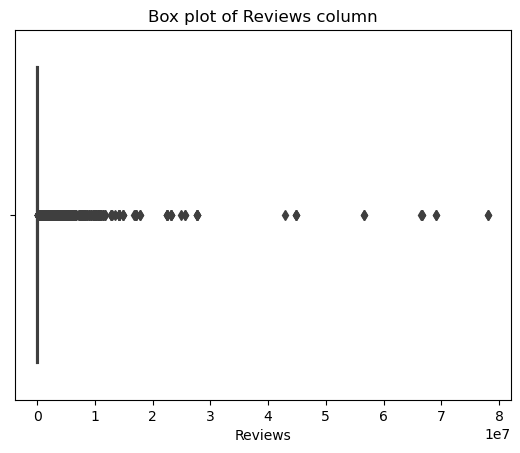

In [25]:
sns.boxplot(x=apps_df["Reviews"])
plt.title("Box plot of Reviews column")
plt.show()

In [26]:
apps_df["Reviews"] = np.log1p(apps_df["Reviews"])

In [27]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


<Axes: >

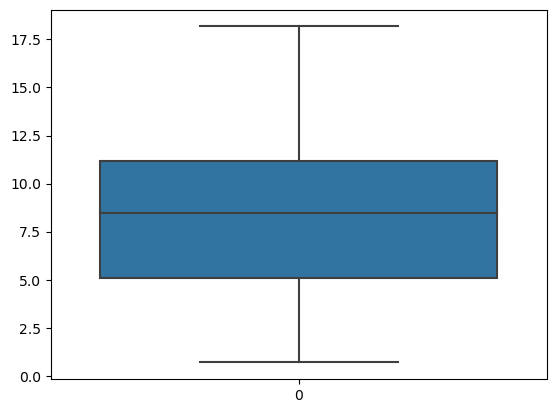

In [28]:
sns.boxplot(apps_df["Reviews"])

###
the outliers is treated using log transformation.  we can observe that there are no outliers now.

### QUESTION 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. 

In [29]:
apps_df[apps_df["Size"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
37,Floor Plan Creator,ART_AND_DESIGN,4.1,10.508896,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,high
42,Textgram - write on photos,ART_AND_DESIGN,4.4,12.595483,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,high
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,9.744375,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,high
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,10.601921,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,high
68,REPUVE,AUTO_AND_VEHICLES,3.9,5.877736,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,8.152486,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,high
10725,Posta App,MAPS_AND_NAVIGATION,3.6,2.197225,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,high
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,6.434547,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,low
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,11.390611,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,high


In [30]:
apps_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [31]:
apps_df["Size"]=apps_df["Size"].replace({"M":"e6","k":"e3"},regex=True)

In [32]:
apps_df = apps_df[apps_df["Size"] != "Varies with device"]

In [33]:
apps_df.shape

(7424, 14)

In [34]:
apps_df["Size"]=apps_df["Size"].astype(float)

### QUESTION 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [35]:
apps_df["Installs"].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

### 
we can see that there is an unwanted charecter  ie "+" ,which need to be removed and the data type is in object which need to be converted to numeric data type

In [36]:
apps_df["Installs"]=(apps_df["Installs"].apply(lambda x:x.strip("+")))

In [37]:
apps_df["Installs"]=pd.to_numeric(apps_df["Installs"].replace(",","",regex=True))

In [38]:
apps_df["Installs"].dtypes

dtype('int64')

### QUESTION11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [39]:
apps_df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

### 
In the price column also there is a unwanted charecter "$" that is to be removed and the data type is to be convered


In [40]:
apps_df["Price"]=apps_df["Price"].replace("\$", "", regex=True)

In [41]:
apps_df["Price"]=pd.to_numeric(apps_df["Price"])

In [42]:
apps_df["Price"].dtypes

dtype('float64')

### QUESTION 12. Drop the columns which you think redundant for the analysis

In [44]:
apps_df.drop(["App", "Rating" ,"Genres","Last Updated", "Current Ver","Android Ver"],axis=1,inplace=True)

In [45]:
apps_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high


In [46]:
apps_df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')


### QUESTION 13. Encode the categorical columns.

In [47]:
dummy_col=pd.get_dummies(data=apps_df,columns=["Category","Content Rating"],drop_first=True,dtype= int)

In [48]:
dummy_col["Rating_category"]=dummy_col["Rating_category"].replace({"low":0,"high":1})
dummy_col["Type"]=dummy_col["Type"].replace({"Free":0,"Paid":1})

In [49]:
dummy_col.head()

,Reviews,Size,Installs,Type,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000000.0,10000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.875232,14000000.0,500000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379520,8700000.0,5000000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281389,25000000.0,50000000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.875232,2800000.0,100000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### QUESTION 14. Segregate the target and independent features

In [50]:
x=dummy_col.drop("Rating_category",axis=1)
y=dummy_col["Rating_category"]

### QUESTION15. Split the dataset into train and test.

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

### QUESTION16. Standardize the data, so that the values are within a particular range.

In [52]:
scaler=StandardScaler()

In [53]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)